# PTO on TSP
## Some TSPLIB problems: a larger experiment

In `TSP.ipynb` we have seen how PTO can be used on TSP with emphasis on how it work.

In this notebook we quickly visualise the results from a larger run. We have 6 problem instances, 4 solvers, 2 generators, linear and structured trace types. We carry out each combination of parameters 30 times and simply use boxplots to visualise the results. Boxplots appear decisive: no statistical tests are needed.

The overall conclusion is that EA with the "smart" generator randsol3 is the best combination by far.

The EA is not unequivocally the best: EA with the simple generator randsol1 is weaker than HC/LA with the same generator.

With RS, randsol3 is better by far.

With HC/LA, the story is less simple: in some cases, randsol1 is better than randsol3.

There is no overall benefit to the structured trace. There are a few cases where it may improve or disimprove performance slightly, but these cases are inconsistent and the margins are smaller than the other results mentioned.

When reading each boxplot, the objective value is on the y-axis. It is the negative of the tour length. Higher is better. Each figure represents the results of one combination of (problem instance, solver). Within each figure, four boxplots represent the combinations of (generator, trace type).

The total runtime was a few days on a 24-core 24Gb RAM Mac Pro with Ubuntu Linux.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MaxNLocator

%matplotlib inline

In [2]:
d = pd.read_csv("TSP_results.dat", delimiter="\t", names=["instance", "solver", "generator", "str_trace", "budget", "rep", "obj", "tour"])

In [104]:
d.head()

,instance,solver,generator,str_trace,budget,rep,obj,tour
0,a280.tsp.gz,EA,randsol1,0,20000,0,-19082.615363,"[116, 90, 97, 71, 55, 72, 13, 279, 277, 249, 2..."
1,a280.tsp.gz,EA,randsol1,0,20000,10,-18868.064504,"[249, 253, 267, 221, 232, 233, 256, 254, 193, ..."
2,a280.tsp.gz,EA,randsol1,0,20000,11,-18665.274098,"[91, 181, 186, 172, 96, 107, 100, 119, 159, 51..."
3,a280.tsp.gz,EA,randsol1,0,20000,12,-18563.069808,"[238, 212, 222, 217, 221, 251, 223, 225, 243, ..."
4,a280.tsp.gz,EA,randsol1,0,20000,13,-19155.940044,"[199, 192, 32, 126, 48, 72, 88, 120, 271, 1, 9..."


# Generate figures and a table for paper

In [106]:
insts = [
 'att48.tsp.gz',
 'berlin52.tsp.gz',
 'eil101.tsp.gz',
 'u159.tsp.gz',
 'a280.tsp.gz',
 'rat575.tsp.gz',
]

In [107]:
solvers = ["RS", "HC", "EA"]
generators = ["randsol1", "randsol3"]
gen_name = {"randsol1": "U", "randsol3": "H"}

print("Solver & Gen & ", end="")
for i, inst in enumerate(insts):
    print("   \multicolumn{2}{|c}{%s} & " % inst.split(".")[0], end="")
print(r"\\")
print(r"\hline")
for solver in solvers:
    for generator in generators:
        print("%s & %s" % (solver, gen_name[generator]), end="")
        for i, inst in enumerate(insts):
            dtmp = d[(d["instance"] == inst) 
                     & (d["str_trace"] == False) 
                     & (d["solver"] == solver) 
                     & (d["generator"] == generator)]
            mean = -dtmp["obj"].mean()
            std = dtmp["obj"].std()
            print(" & %.0f & (%.0f)" % (mean, std), end="")
        print(r"\\")

Solver & Gen &    \multicolumn{2}{|c}{att48} &    \multicolumn{2}{|c}{berlin52} &    \multicolumn{2}{|c}{eil101} &    \multicolumn{2}{|c}{u159} &    \multicolumn{2}{|c}{a280} &    \multicolumn{2}{|c}{rat575} & \\
\hline
RS & U & 112397 & (3521) & 23108 & (464) & 2854 & (43) & 381521 & (5157) & 30203 & (420) & 104536 & (935)\\
RS & H & 71150 & (2084) & 15878 & (448) & 2029 & (40) & 222018 & (3822) & 18542 & (304) & 64691 & (608)\\
HC & U & 67573 & (4875) & 14699 & (827) & 1628 & (79) & 198736 & (8807) & 16390 & (520) & 59456 & (1385)\\
HC & H & 59976 & (6092) & 13850 & (1110) & 1888 & (100) & 201490 & (12426) & 18286 & (1084) & 65858 & (2172)\\
EA & U & 68377 & (4678) & 14103 & (913) & 1747 & (97) & 224842 & (9276) & 18936 & (499) & 70865 & (1183)\\
EA & H & 67503 & (5192) & 14727 & (1065) & 1910 & (65) & 112444 & (6228) & 10086 & (279) & 34949 & (705)\\


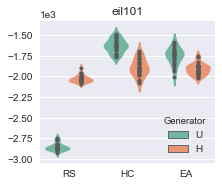

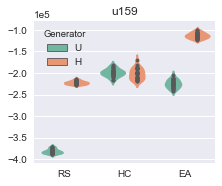

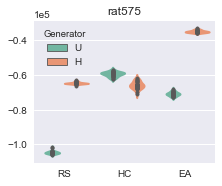

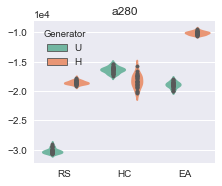

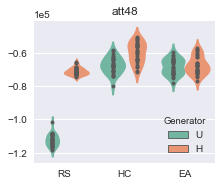

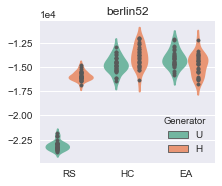

In [87]:
solvers = ["RS", "HC", "EA"]
generators = ["randsol1", "randsol3"]
gen_name = {"randsol1": "U", "randsol3": "H"}
#gen_name = {"randsol1": "Unbiased", "randsol3": "Heuristic"}

sns.set()

for i, inst in enumerate(insts):
    dtmp = d[(d["instance"] == inst) & (d["str_trace"] == False) & (d["solver"] != "LA")]
    dtmp = dtmp.assign(Generator=dtmp.generator.map(gen_name)) 
    #dtmp = [dtmp[(d["solver"] == solver) & (d["generator"] == generator)]["obj"] for solver in solvers for generator in generators]
    sns.violinplot(x="solver", hue="Generator", y="obj", data=dtmp, order=solvers, inner="points",
                  palette=sns.color_palette("Set2", 10))
    
    plt.ylabel("")
    #labels = ["%s, %s" % (solver, gen_name[generator]) for solver in solvers for generator in generators]
    inst_txt = inst.split(".")[0]
    plt.title(inst_txt)
    fig = plt.gcf()
    fig.set_size_inches(3.25, 2.75)
    ax = plt.gca()
    ax.set_xlabel("")
    #fmt = FormatStrFormatter('%1.1f')
    #fmt.use_offset(True)
    #ax.yaxis.set_major_formatter(fmt)
    #ax.get_yaxis().get_major_formatter().set_useOffset(True)
    #locater = MaxNLocator(nbins=4)
    #ax.yaxis.set_major_locator(locater)
    fmt = ScalarFormatter()
    fmt.set_powerlimits((-3, 3))
    ax.yaxis.set_major_formatter(fmt)
    #ax.get_yaxis().ticklabel_format(useOffset=False) 
    plt.tight_layout()
    plt.savefig("img/TSP_violinplot_%s.pdf" % inst_txt)
    plt.show()
    

# Instance: 'att48.tsp.gz'

Observation: HC, LA, EA all do much better than RS. All do better with the smart generator than the simple one. Even RS with the smart generator is not too bad. Choice of linear versus structured trace doesn't make a big difference.

## Random search

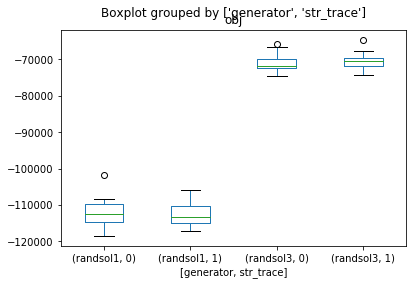

In [40]:
d[(d["instance"] == "att48.tsp.gz") & (d["solver"] == "RS")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Hill-climbing

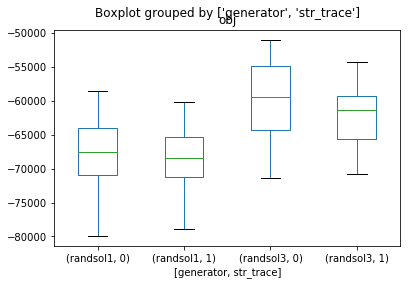

In [41]:
d[(d["instance"] == "att48.tsp.gz") & (d["solver"] == "HC")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Late-acceptance

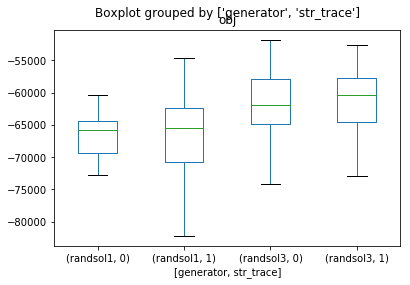

In [42]:
d[(d["instance"] == "att48.tsp.gz") & (d["solver"] == "LA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Evolutionary algorithm

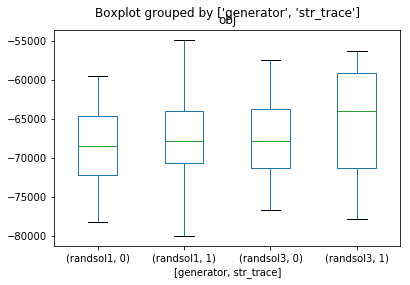

In [43]:
d[(d["instance"] == "att48.tsp.gz") & (d["solver"] == "EA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

# Instance: 'u159.tsp.gz'

Observation: EA > HC and LA > RS. For EA and RS, (smart) randsol3 much better. No benefit to structured trace.

## Random search

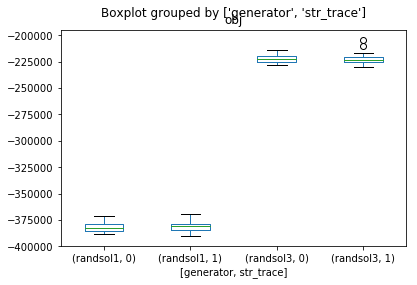

In [44]:
d[(d["instance"] == "u159.tsp.gz") & (d["solver"] == "RS")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Hill-climbing

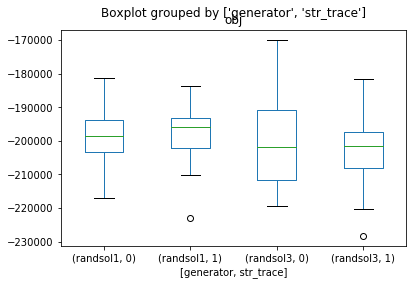

In [45]:
d[(d["instance"] == "u159.tsp.gz") & (d["solver"] == "HC")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Late-acceptance

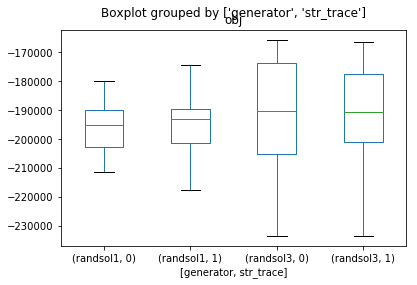

In [46]:
d[(d["instance"] == "u159.tsp.gz") & (d["solver"] == "LA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Evolutionary algorithm

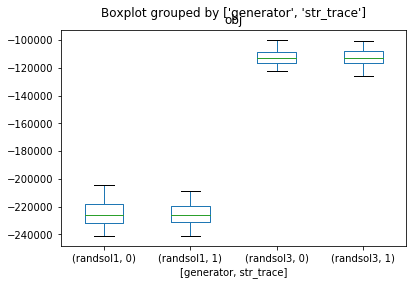

In [47]:
d[(d["instance"] == "u159.tsp.gz") & (d["solver"] == "EA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

# Instance: 'a280.tsp.gz'

Observation: similar to u159, except that for HC and LA, randsol3 is slightly worse.

## Random search

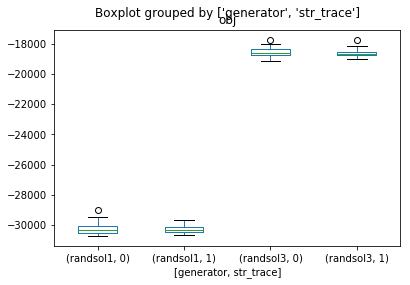

In [34]:
d[(d["instance"] == "a280.tsp.gz") & (d["solver"] == "RS")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Hill-climbing

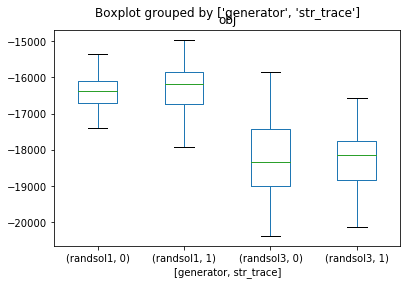

In [35]:
d[(d["instance"] == "a280.tsp.gz") & (d["solver"] == "HC")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Late-acceptance

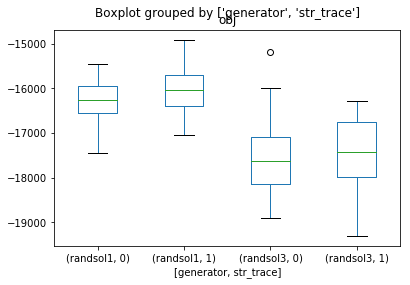

In [36]:
d[(d["instance"] == "a280.tsp.gz") & (d["solver"] == "LA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Evolutionary algorithm

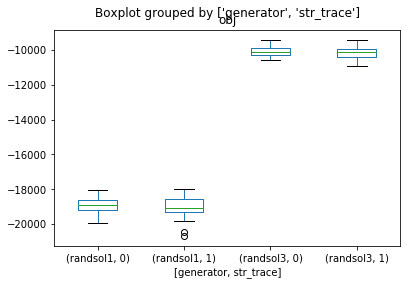

In [37]:
d[(d["instance"] == "a280.tsp.gz") & (d["solver"] == "EA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

# Instance: 'rat575.tsp.gz'

Observation: very similar story to a280. The surprising benefit of randsol1 on HC and LA is stronger here. But still EA with randsol3 is by far the best.

## Random search

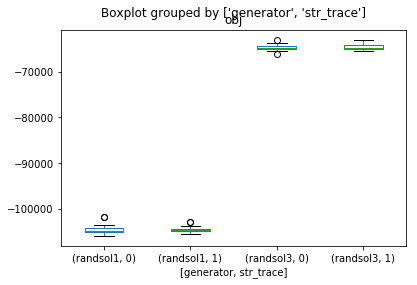

In [48]:
d[(d["instance"] == "rat575.tsp.gz") & (d["solver"] == "RS")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Hill-climbing

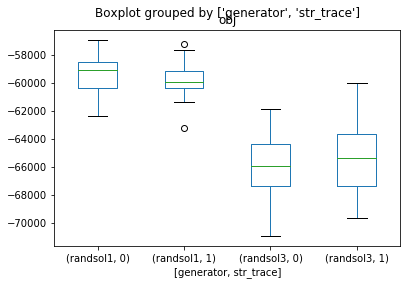

In [49]:
d[(d["instance"] == "rat575.tsp.gz") & (d["solver"] == "HC")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Late-acceptance

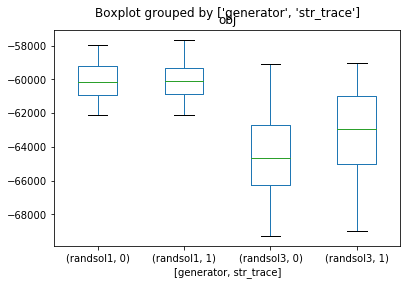

In [50]:
d[(d["instance"] == "rat575.tsp.gz") & (d["solver"] == "LA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Evolutionary algorithm

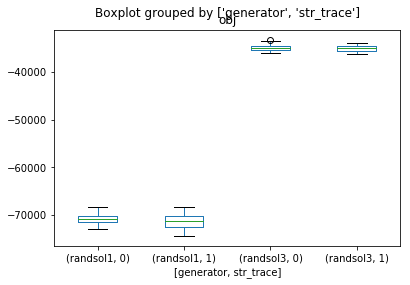

In [51]:
d[(d["instance"] == "rat575.tsp.gz") & (d["solver"] == "EA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);